<a href="https://colab.research.google.com/github/IssamMerikhi/PibeOro-A.I./blob/main/PibeOro_A_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Game Results





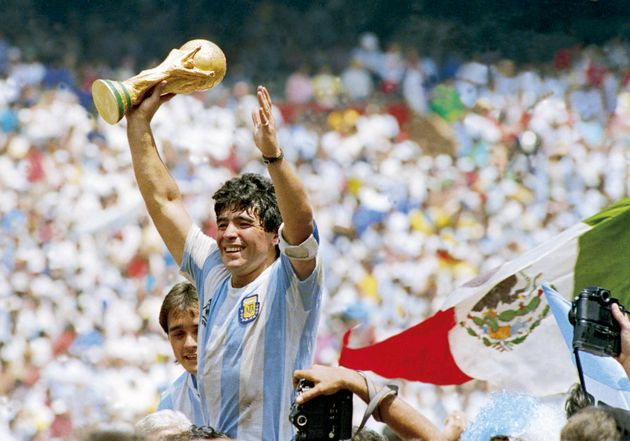



> Football is the most popular sport in the world
> There is a bench of data/actors behind a simple game :


*   Players - Coach - Staff - Marketing Team - Supporters 
*   Data : Win - Lose - Draw - Shot - On target - Passes
*   Salary - Transfer - Sponsoring - TV Industry
*   Wheather conditions - Feeling bewteen Players...

#Import Dependecies

In [6]:
"""
BOX GOAL : IMPORT ALL DEPENDENCIES.
"""


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
import plotly.io as pio
from sklearn.feature_selection import SelectKBest, chi2
import plotly.express as px
from sklearn.preprocessing import scale
import plotly.graph_objs as go
import plotly.figure_factory as ff
import orca
import plotly.io as pio

In [ ]:
"""
BOX GOAL : DISPLAY PLOTLY GRAPHS ON GITHUB (only for the Data Viz part)

If we present on Github, we have to add the ' renderer = "svg" ' on fig.show() as 
follow : fig.show(renderer = "svg")
Because it makes the figs statics, and no dynamic no more. (github performs a static
render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph)
But in Google Colab, I prefer have dynamics figure than statics.

Je ne sais pas si c'est clair en anglais :
J'ai mis mon notebook sur Github mais Github n'affiche pas les graphs plotly.
J'ai donc fait une manipulation qui change l'extension des graphs plotly interactifs en graphs static.
C'était juste une question d'affichage et d'esthétique...

"""

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [8]:
"""
BOX GOAL : IMPORT THE DATA AND DISPLAY A COUPLE OF ROWS
"""

# Read data and drop redundant column.
data = pd.read_csv('PL.csv')

# Preview data.
data.head()


# FTR = Full time result
# FTHG = Full time home goals
# FTAG = Full time away goals
# HTR = Half time result
# HTHG = Half time home goals
# HTAG = Half time away goals
# ETR = Extra time Result
# ETHG = Extra time home goals
# ETAG = Extra time away goals
# PENR = Penalty shootout Result
# PENHG = Penalty shootout home goals
# PENAG = Penalty shootout away goals
# H_ST = Home team shots total
# H_SOG = Home team shots on goal
# H_SFG = Home team shots off goal
# H_PT = Home team possession time
# H_COR = Home team corners
# H_FL = Home team fouls
# H_TC = Home team yellow cards
# H_RC = Home team red cards
# A_ST = Away team shots total
# A_SOG = Away team shots on goal
# A_SFG = Away team shots off goal
# A_PT = Away team possession time
# A_COR = Away team corners
# A_FL = Away team fouls
# A_TC = Away team yellow cards
# A_RC = Away team red cards

,Date,Country,League,Type,Season,Home_Team,Away_team,FTR,FTHG,FTAG,HTR,HTHG,HTAG,ETR,ETHG,ETAG,PENR,PENHG,PENAG,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
0,2017-08-11,England,Premier League,LEAGUE,2017/2018,Arsenal,Leicester City,2,4,3,D,2,2,NaN,NaN,NaN,NaN,NaN,NaN,27,10,9,64,9,9,0,0,6,3,3,36,4,12,1,0
1,2017-08-12,England,Premier League,LEAGUE,2017/2018,Chelsea,Burnley,1,2,3,A,0,3,NaN,NaN,NaN,NaN,NaN,NaN,19,6,6,59,8,16,4,2,10,5,4,41,5,11,3,0
2,2017-08-12,England,Premier League,LEAGUE,2017/2018,Watford,Liverpool,0,3,3,H,2,1,NaN,NaN,NaN,NaN,NaN,NaN,9,4,4,49,3,14,0,0,14,5,8,51,3,8,3,0
3,2017-08-12,England,Premier League,LEAGUE,2017/2018,Brighton & Hove Albion,Manchester City,1,0,2,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2,27,3,6,0,0,14,4,5,73,10,9,2,0
4,2017-08-12,England,Premier League,LEAGUE,2017/2018,Southampton,Swansea City,0,0,0,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,29,2,16,59,13,10,2,0,4,0,2,41,0,13,1,0


In [9]:
data.FTR.unique()
# 2 means Home Team Win
# 1 means Away Team Win
# 0 means Draw

array([2, 1, 0])

In [10]:
"""
BOX GOAL : DISPLAY A SUMMARY OF OUR FEATURES
"""

print('The dataframe shape is :', data.shape)
print('Very basic stuff:')
data.describe()

The dataframe shape is : (1139, 35)
Very basic stuff:


,FTR,FTHG,FTAG,HTHG,HTAG,ETR,ETHG,ETAG,PENR,PENHG,PENAG,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,0.0,0.0,0.0,0.0,0.0,0.0,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,1.232660,1.539947,1.202809,0.662862,0.546971,NaN,NaN,NaN,NaN,NaN,NaN,13.633889,4.647059,6.639157,50.861282,5.740123,10.239684,1.568920,0.049166,11.080773,3.919227,5.437226,49.138718,4.679543,10.533802,1.733099,0.064091
std,0.798364,1.299903,1.185794,0.848103,0.760536,NaN,NaN,NaN,NaN,NaN,NaN,5.691878,2.633453,3.611237,12.926386,3.066497,3.394864,1.264404,0.224287,4.907095,2.357087,3.240813,12.926386,2.782704,3.550718,1.281497,0.248584
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,3.000000,4.000000,42.000000,3.000000,8.000000,1.000000,0.000000,7.000000,2.000000,3.000000,39.000000,3.000000,8.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,4.000000,6.000000,51.000000,5.000000,10.000000,1.000000,0.000000,11.000000,4.000000,5.000000,49.000000,4.000000,10.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,6.000000,9.000000,61.000000,8.000000,12.000000,2.000000,0.000000,14.000000,5.000000,7.000000,58.000000,6.000000,13.000000,3.000000,0.000000
max,2.000000,8.000000,9.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,16.000000,22.000000,83.000000,18.000000,23.000000,7.000000,2.000000,30.000000,15.000000,20.000000,83.000000,16.000000,26.000000,7.000000,2.000000


#Data Processing

In [13]:
"""
BOX GOAL : SPLIT THE INTEREST VAR Y AND THE FEATURES MATRIX X AND SCALE THEM

On prépare nos données. Notre variable target est FTR = Full Time Result.
Les autres variables sont des caractéristiques (X)
On scale pour éviter les problèmes de taille
"""


# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.

#Center to the mean and component wise scale to unit variance.
cols = [['H_ST','H_SOG','H_SFG','H_PT','H_COR','H_FL','H_YC','H_RC','A_ST','A_SOG','A_SFG','A_PT','A_COR','A_FL','A_YC','A_RC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [14]:
"""
BOX GOAL : DROP ALL THE USELESS VARIABLES AND SCALE THE OTHERS

On garde seulement les variables numériques.
On affiche la tête de notre dataset pour avoir une petite idée.
"""

X_all = data.drop(['HTAG','HTHG','FTAG','FTHG','HTR','Date','FTR','Country','League','Type','Season','Home_Team','Away_team','ETR','ETHG','ETAG','PENR','PENHG','PENAG'],1)

# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,H_ST,H_SOG,H_SFG,H_PT,H_COR,H_FL,H_YC,H_RC,A_ST,A_SOG,A_SFG,A_PT,A_COR,A_FL,A_YC,A_RC
0,27,10,9,64,9,9,0,0,6,3,3,36,4,12,1,0
1,19,6,6,59,8,16,4,2,10,5,4,41,5,11,3,0
2,9,4,4,49,3,14,0,0,14,5,8,51,3,8,3,0
3,6,2,2,27,3,6,0,0,14,4,5,73,10,9,2,0
4,29,2,16,59,13,10,2,0,4,0,2,41,0,13,1,0


In [15]:
"""
BOX GOAL : HAVE A X-MATRIX WITH ONLY RELEVANT FEATURES.

Pour maximiser la performance de nos classificateurs on va choisir les features les plus pertinentes.
Pour cela on utilise une de techniques :

  - Variance Thresold
  - SelectKBest
  - SelectFromModel
  - CoefficientMatrix
  - RPE

Threshold regarde la variance des features et enlève les caractéristiques qui ne varient pas beaucou.
Les autres utilisent des tests statitiques/estimation de coefficients.
Dans notre cas on a choisi le Khi-2 test qui est commun pour les problèmes de classification
(ANOVA could do the job too)
On a choisi arbitrairement k=5 par ce qu'on a voulu travailler avec 5 features.

A la fin de cette box on a une matrice X avec 5 plus pertinentes features.
On va utliser des méthodes de regularisation comme rigde, lasso elasticnet plus tard dans le notebook.
"""

sel = SelectKBest(chi2, k = 5)
sel.fit(X_all, y_all)
X = sel.transform(X_all)
X = pd.DataFrame(X)
X

,0,1,2,3,4
0,27,10,6,3,36
1,19,6,10,5,41
2,9,4,14,5,51
3,6,2,14,4,73
4,29,2,4,0,41
...,...,...,...,...,...
1134,13,1,12,3,46
1135,3,2,14,6,75
1136,13,5,19,6,49
1137,31,10,5,4,27


#Data Visualisation

In [21]:
import orca, kaleido
import pandas as pd
import plotly.express as px
df = pd.read_csv('PL.csv')


scattermatrix = px.scatter_matrix(df,
    dimensions=['H_ST', 'H_SOG', 'H_SFG', 'H_PT', 'H_COR', 'H_FL'],
    color = "FTR",
    labels={
        "H_SOG": "On Targ",
        "H_SFG": "Not Targ",
        "H_PT": "Possess",
        "H_COR": "Corner",
        "H_FL": "Fouls"
        }
    )

scattermatrix.update_traces(marker=dict(size=5), diagonal_visible=False)
scattermatrix.update_layout(title = "Graphic Analysis 1 : Scatterplot Matrix",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False,
                      xaxis_title=" ",
                      yaxis_title=" ")


scattermatrix.show(renderers="svg")

In [22]:
correlations = X_all.corr()
np.array(correlations)

x_var = ['H_ST', 'H_SOG', 'H_SFG', 'H_PT', 'H_COR', 'H_FL', 'H_YC', 'H_RC','A_ST', 'A_SOG', 'A_SFG', 'A_PT', 'A_COR', 'A_FL', 'A_YC', 'A_RC']
y_var = ['H_ST', 'H_SOG', 'H_SFG', 'H_PT', 'H_COR', 'H_FL', 'H_YC', 'H_RC','A_ST', 'A_SOG', 'A_SFG', 'A_PT', 'A_COR', 'A_FL', 'A_YC', 'A_RC']

trace = go.Heatmap(
   x = x_var,
   y = y_var,
   z = correlations,
   type = 'heatmap',
   colorscale = 'Plasma'
)
data = [trace]
heatmap = go.Figure(data = data)
heatmap.update_layout(title = "Graphic Analysis 2 : Heatmap",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False,
                      xaxis_title=" ",
                      yaxis_title=" ")
heatmap.show(renderers="svg")

"""
On peut clairement voir 2 blocs de carrés de couleur jaunes,
En effet, les cractéristiques de l'équipe Home sont corrélées postiviement
entre elles et vice versa les caractéristiques de l'équipe Away sont corrélées 
positivement entre elles.
"""

"\nOn peut clairement voir 2 blocs de carrés de couleur jaunes,\nEn effet, les cractéristiques de l'équipe Home sont corrélées postiviement\nentre elles et vice versa les caractéristiques de l'équipe Away sont corrélées \npositivement entre elles.\n"

In [23]:
import plotly.express as px
df = pd.read_csv('PL.csv')
scat1 = px.scatter(df, x=df["H_PT"], y="H_COR", color="FTR",color_continuous_scale=px.colors.sequential.Plasma, trendline="lowess", template="simple_white", size="FTHG",
                 labels={
                     "H_PT": "Possession Home Team (%)",
                     "H_COR": "Numbers of corners "
                 },
                title="")
scat1.update_layout(title = "Graphic Analysis 3 : Scatter Plot - Possession",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False)
scat1.show(renderers="svg")


"""
Plus la possession de l'équipe augmente, plus les corners augmentent
ce qui semble justifié d'un point de vu purement footballistique.
Les points ont différentes couleurs (jaune = Home Win, Purple = Draw, Bleu = Away Win)
Les points sont de différentes épaisseurs, plus le point et épais, plus le nombre de
but de l'équipe Home est grand. C'est pour cette raison que nous avons utilisé Plotly.
On peut représenter un grand nombre de caractéristiques sur 1 graph.
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



"\nPlus la possession de l'équipe augmente, plus les corners augmentent\nce qui semble justifié d'un point de vu purement footballistique.\nLes points ont différentes couleurs (jaune = Home Win, Purple = Draw, Bleu = Away Win)\nLes points sont de différentes épaisseurs, plus le point et épais, plus le nombre de\nbut de l'équipe Home est grand. C'est pour cette raison que nous avons utilisé Plotly.\nOn peut représenter un grand nombre de caractéristiques sur 1 graph.\n"

In [24]:
import plotly.express as px
df = pd.read_csv('PL.csv')
scat2 = px.scatter(df, x="H_ST", y="A_ST", color=y_all, color_continuous_scale=px.colors.sequential.Plasma, trendline="lowess", template="simple_white", size="H_PT",
                 labels={
                     "H_ST": "Home Team Total Shots",
                     "A_ST": "Away Team Total Shots"
                 },
                title="")

scat2.update_layout(title = "Graphic Analysis 4 : Scatter Plot - Home Team Total Shot",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False)
scat2.show(renderers="svg")


"""
Le nombre de titre de l'équipe H (Home) en abcisse et le nombre de titre
de l'équipe A (Away) en ordonné. Intuitivement, quand une équipe domine,
elle tire souvent au but et donc empêche l'équipe adversaire de tirer.
C'est pourquoi la courbe décroit.
"""

"\nLe nombre de titre de l'équipe H (Home) en abcisse et le nombre de titre\nde l'équipe A (Away) en ordonné. Intuitivement, quand une équipe domine,\nelle tire souvent au but et donc empêche l'équipe adversaire de tirer.\nC'est pourquoi la courbe décroit.\n"

In [25]:
df = pd.read_csv('PL.csv')
df_hist = pd.DataFrame({'Home':  df['H_PT'], 'Away': df['A_PT']})
colors = ['rgb(255,215,0)', 'rgb(75,0,130)']
hist = ff.create_distplot([df_hist[c] for c in df_hist.columns], df_hist.columns, bin_size=2, colors=colors )
hist.update_layout(title = "Graphic Analysis 5 : Histogram Possession",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False)
hist.show(renderers="svg")

"""
Ce graphique permet d'avoir un point de vu sur l'expression souvent utilisée dans le football
'L'équipe a domicile a plus de possession' : cette affiramtion se trouve être graphiquement juste
En regardant les distributions on voit que l'équipe H a un pourcentage de possession de 
balle plus élevé que l'équipe A.
"""

"\nCe graphique permet d'avoir un point de vu sur l'expression souvent utilisée dans le football\n'L'équipe a domicile a plus de possession' : cette affiramtion se trouve être graphiquement juste\nEn regardant les distributions on voit que l'équipe H a un pourcentage de possession de \nballe plus élevé que l'équipe A.\n"

In [27]:
df = pd.read_csv('PL.csv')
color_discrete_map = {'Home': 'rgb(255,215,0)', 'Away': 'rgb(75,0,130)'}

stages = ["Possession", "Nombre de tirs", "Tirs cadrés", "Corners", "Fautes"]
df_home = pd.DataFrame(dict(number=[df['H_PT'].max(), df['H_ST'].max(), df['H_SOG'].max(), df['H_COR'].max(), df['H_FL'].max()], stage=stages))
df_home['Team'] = 'Home'
df_away = pd.DataFrame(dict(number=[df['A_PT'].max(), df['A_ST'].max(), df['A_SOG'].max(), df['A_COR'].max(), df['A_FL'].max()], stage=stages))
df_away['Team'] = 'Away'
df = pd.concat([df_home, df_away], axis=0)
funnel = px.funnel(df, x='number', y='stage', color='Team',color_discrete_map=color_discrete_map)
funnel.update_layout(title = "Graphic Analysis 7 : Funnel",
                      title_x = 0.5, title_font_size = 20, coloraxis_showscale=False,
                      xaxis_title=" ",
                      yaxis_title=" ")
funnel.show(renderers="svg")

"""
Ici nous avons essayé de reproduire un graphique communément utilisé par les experts.
Il montre les caractéristiques d'un match. Nous avons essayer de voir les meilleures
statistiques d'une équipe H contre une équipe A.
Il en ressort que l'équipe H a de meilleures statistiques dans tous les domaines.

Il serait plus judicieux de prendre la valeur moyenne avec .mean()
Mais plotly n'affiche pas bien les valeurs et le graphique qui en
ressort n'est pas assez bien interprétable.
"""

"\nIci nous avons essayé de reproduire un graphique communément utilisé par les experts.\nIl montre les caractéristiques d'un match. Nous avons essayer de voir les meilleures\nstatistiques d'une équipe H contre une équipe A.\nIl en ressort que l'équipe H a de meilleures statistiques dans tous les domaines.\n\nIl serait plus judicieux de prendre la valeur moyenne avec .mean()\nMais plotly n'affiche pas bien les valeurs et le graphique qui en\nressort n'est pas assez bien interprétable.\n"